<a href="https://colab.research.google.com/github/BenjaminUy/Predicting-Loan-User-Default-Risk/blob/main/notebooks/Cleaning_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **India Loan Users - Data Cleaning & Analysis**
Notebook creator: Benjamin Uy

Date created: 6/28/2025

---
Introduction: This is my Jupyter notebook for performing data cleaning and analysis on a Kaggle dataset on loan customers from India.

The dataset I will use is from Kaggle user Subham Surana's "Loan Prediction Based on Customer Behavior" (link below). The original dataset has 13 columns and +250,000 rows, where each row is a consumer user including details like age, income, geography, and whether or not they were flagged. Note that this dataset was organized by Univ.AI.

Link to dataset: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv


### Data Dive and Data Cleaning

In [34]:
# Import required modules
import pandas as pd
import numpy as np

In [35]:
# URL to dataset from project repo
url = 'https://raw.githubusercontent.com/BenjaminUy/Predicting-Loan-User-Default-Risk/refs/heads/main/datasets/loan_users.csv'

df = pd.read_csv(url);
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [36]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [37]:
df['Risk_Flag'].value_counts(normalize=True)

,proportion
Risk_Flag,
0,0.877
1,0.123


It appears that about 12% of loan users in this dataset were flagged for potentially defaulting.

In [38]:
# I will drop Id as this likely won't be useful in future analysis
df = df.drop(columns = ['Id'])

In [39]:
# Remove rows with null values
df = df.dropna(axis=0)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [40]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [41]:
df['Profession'].value_counts().head(10)

,count
Profession,
Physician,5957
Statistician,5806
Web_designer,5397
Psychologist,5390
Computer_hardware_engineer,5372
Drafter,5359
Magistrate,5357
Fashion_Designer,5304
Air_traffic_controller,5281


In [42]:
df['CITY'].value_counts().head(10)

,count
CITY,
Vijayanagaram,1259
Bhopal,1208
Bulandshahr,1185
Saharsa[29],1180
Vijayawada,1172
Srinagar,1136
Indore,1130
New_Delhi,1098
Hajipur[31],1098


In [43]:
df['STATE'].value_counts().head(10)

,count
STATE,
Uttar_Pradesh,28400
Maharashtra,25562
Andhra_Pradesh,25297
West_Bengal,23483
Bihar,19780
Tamil_Nadu,16537
Madhya_Pradesh,14122
Karnataka,11855
Gujarat,11408


There seem to be some formatting inconsistencies such as mixed cases in Profession and extra characters in CITY (and possibly) STATE. Let's fix them.

In [44]:
import re

# Formatting STATE to proper case
df['STATE'] = df['STATE'].str.title()

# Removing instances of square brackets
pattern = r"\[(\d+)\]"
repl = ''
df['STATE'] = df['STATE'].apply(lambda x : re.sub(pattern, repl, x))

df['STATE'].value_counts()

,count
STATE,
Uttar_Pradesh,29143
Maharashtra,25562
Andhra_Pradesh,25297
West_Bengal,23483
Bihar,19780
Tamil_Nadu,16537
Madhya_Pradesh,14122
Karnataka,11855
Gujarat,11408


In [45]:
# Formatting CITY to proper case
df['CITY'] = df['CITY'].str.title()

# Removing instances of square brackets
pattern = r"\[(\d+)\]"
repl = ''
df['CITY'] = df['CITY'].apply(lambda x : re.sub(pattern, repl, x))

df['CITY'].value_counts()

,count
CITY,
Aurangabad,1543
Vijayanagaram,1259
Bhopal,1208
Bulandshahr,1185
Saharsa,1180
...,...
Ujjain,486
Warangal,459
Bettiah,457


In [46]:
# Formatting Profession to proper case
df['Profession'] = df['Profession'].str.title()

# Just in case, removing instances of square brackets
pattern = r"\[(\d+)\]"
repl = ''
df['Profession'] = df['Profession'].apply(lambda x : re.sub(pattern, repl, x))

df['Profession'].value_counts()

,count
Profession,
Physician,5957
Statistician,5806
Web_Designer,5397
Psychologist,5390
Computer_Hardware_Engineer,5372
Drafter,5359
Magistrate,5357
Fashion_Designer,5304
Air_Traffic_Controller,5281


In [47]:
df.nunique()

,0
Income,41920
Age,59
Experience,21
Married/Single,2
House_Ownership,3
Car_Ownership,2
Profession,51
CITY,316
STATE,28
CURRENT_JOB_YRS,15


Things to note:
- In terms of non-numeric columns, Profession, CITY, and STATE have the most unique values.
- We'll need to find ways to reduce this number, if I am to continue using these features for further analysis.
- Married/Single, House_Ownership, Car_Ownership, CURRENT_HOUSE_YRS, and Risk_Flag could be categorical.

Future steps:
- Since CITY may have too many values to work with as a categorical variable, I could discard this feature, since STATE may implicitly account for removing CITY.
- Find ways to group Professions by same sector (e.g., military, politics, engineering, etc.)
- Alternative approach to grouping Professions: create a variable that indicates if the user's income is an outlier, given their profession.
- Could create variable that indicates if there is a incongruity between the STATE and CITY variables (i.e., if a STATE should not be associated with a CITY).


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [49]:
'''
Let's see if we can indicate whether a person's income is a significantly
lower given their profession, state, and city. Perhaps this might suggest
a person is less financially stable than others in the same profession, and
thus more likely to default.
'''

# Here, I define an income as 'significantly lower' if it is less than the 5% quantile
threshold = 0.05

income_group = df.groupby(['Profession', 'STATE', 'CITY'])['Income'].quantile(threshold)
income_group.head()

Profession              STATE           CITY       
Air_Traffic_Controller  Andhra_Pradesh  Adoni          8835408.05
                                        Amaravati      9287884.90
                                        Anantapur       626126.20
                                        Anantapuram     505809.00
                                        Bhimavaram     1482344.00
Name: Income, dtype: float64

In [50]:
# Now, we create an indicator variable checking if a person's income, given their
# profession, state, and city is higher than or equal to this threshold
df['Above_Income_Threshold'] = df.apply(lambda x: 1 if x['Income'] >= income_group[x['Profession'], x['STATE'], x['CITY']] else 0, axis=1)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Above_Income_Threshold
0,1303834,23,3,single,rented,no,Mechanical_Engineer,Rewa,Madhya_Pradesh,3,13,0,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1
2,3991815,66,4,married,rented,no,Technical_Writer,Alappuzha,Kerala,4,10,0,1
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1
4,5768871,47,11,single,rented,no,Civil_Servant,Tiruchirappalli,Tamil_Nadu,3,14,1,1


In [59]:
df['House_Ownership'].value_counts()

,count
House_Ownership,
rented,231898
owned,12918
norent_noown,7184


In [60]:
# Convert Married/Single to a binary variable to indicate the person is married (1)
df['Married/Single'] = df['Married/Single'].apply(lambda x: 1 if x == 'married' else 0)
df.rename({'Married/Single' : 'Is_Married'})

# Same with car ownership
df['Car_Ownership'] = df['Car_Ownership'].apply(lambda x: 1 if x == 'yes' else 0)
df.rename({'Car_Ownership' : 'Owns_Car'})

# Convert House_Ownership to an ordinal categorical variable where:
# norent_noown = 0, rented = 1, owned = 2
df['House_Ownership'] = df['House_Ownership'].apply(lambda x: 0 if x == 'norent_noown' else 1 if x == 'rented' else 2)
df.rename({'House_Ownership' : 'House_Ownership_Ordinal'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Income                  252000 non-null  int64 
 1   Age                     252000 non-null  int64 
 2   Experience              252000 non-null  int64 
 3   Married/Single          252000 non-null  int64 
 4   House_Ownership         252000 non-null  int64 
 5   Car_Ownership           252000 non-null  int64 
 6   Profession              252000 non-null  object
 7   CITY                    252000 non-null  object
 8   STATE                   252000 non-null  object
 9   CURRENT_JOB_YRS         252000 non-null  int64 
 10  CURRENT_HOUSE_YRS       252000 non-null  int64 
 11  Risk_Flag               252000 non-null  int64 
 12  Above_Income_Threshold  252000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 25.0+ MB


### Data Exploration/Analysis

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Income                  252000 non-null  int64 
 1   Age                     252000 non-null  int64 
 2   Experience              252000 non-null  int64 
 3   Married/Single          252000 non-null  object
 4   House_Ownership         252000 non-null  object
 5   Car_Ownership           252000 non-null  object
 6   Profession              252000 non-null  object
 7   CITY                    252000 non-null  object
 8   STATE                   252000 non-null  object
 9   CURRENT_JOB_YRS         252000 non-null  int64 
 10  CURRENT_HOUSE_YRS       252000 non-null  int64 
 11  Risk_Flag               252000 non-null  int64 
 12  Above_Income_Threshold  252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


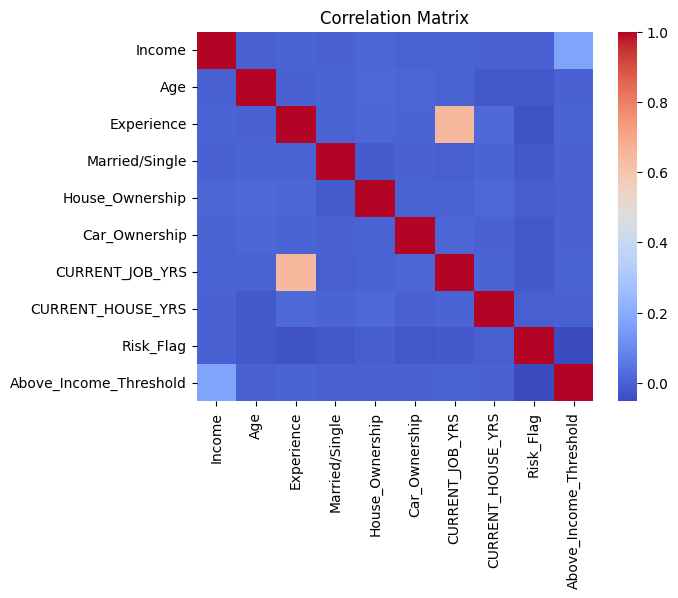

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Notes from above:
- Moderate correlation between Experience and CURRENT_JOB_YRS (makes sense)
- Slight correlation between Above_Income_Threshold and Income (also makes sense)

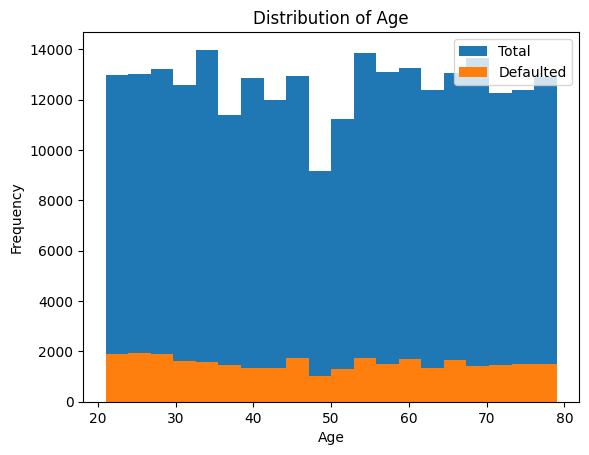

In [83]:
# Let's look into the distribution of loan users' age
plt.hist(df['Age'], bins=20)

# Stack to show those who defaulted
plt.hist(df[df['Risk_Flag'] == 1]['Age'], bins=20)

plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [87]:
# Now for state
state_counts = df['STATE'].value_counts()
state_counts.head()

,count
STATE,
Uttar_Pradesh,29143
Maharashtra,25562
Andhra_Pradesh,25297
West_Bengal,23483
Bihar,19780


In [88]:
risk_state_counts = df[df['Risk_Flag'] == 1]['STATE'].value_counts()
risk_state_counts.head()

,count
STATE,
Uttar_Pradesh,3440
West_Bengal,3009
Andhra_Pradesh,2935
Maharashtra,2895
Bihar,2583


In [89]:
# Merge risk_state_counts with state_counts by key of STATE
state_counts = state_counts.to_frame(name='Total')
risk_state_counts = risk_state_counts.to_frame(name='Defaulted')

state_counts = state_counts.merge(risk_state_counts, on='STATE', how='left')
state_counts.fillna(0, inplace=True)
state_counts.head()

,Total,Defaulted
STATE,,
Uttar_Pradesh,29143,3440
Maharashtra,25562,2895
Andhra_Pradesh,25297,2935
West_Bengal,23483,3009
Bihar,19780,2583


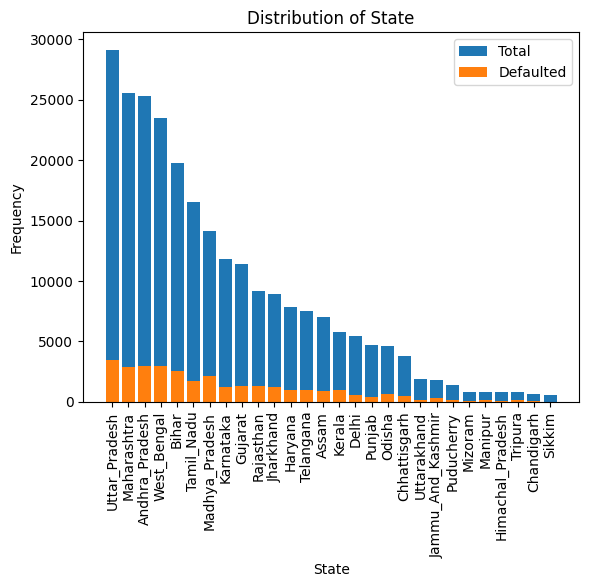

In [90]:
plt.bar(state_counts.index, state_counts['Total'])
plt.bar(state_counts.index, state_counts['Defaulted'])
plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of State')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

There does not appear to be any clear pattern with Age and State and default risk.

In [95]:
# What about CURRENT_JOB_YRS (and CURRENT_HOUSE_YRS)

job_yrs_counts = df['CURRENT_JOB_YRS'].value_counts()
risk_job_yrs_counts = df[df['Risk_Flag'] == 1]['CURRENT_JOB_YRS'].value_counts()

job_yrs_counts = job_yrs_counts.to_frame(name='Total')
risk_job_yrs_counts = risk_job_yrs_counts.to_frame(name='Defaulted')

job_yrs_counts = job_yrs_counts.merge(risk_job_yrs_counts, on='CURRENT_JOB_YRS', how='left')
job_yrs_counts.fillna(0, inplace=True)

job_yrs_counts.head()

,Total,Defaulted
CURRENT_JOB_YRS,,
3,29460,3411
4,28339,3207
5,25091,2972
6,23491,2870
7,19925,2345


In [97]:
job_yrs_counts.index

Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 0, 12, 13, 14], dtype='int64', name='CURRENT_JOB_YRS')

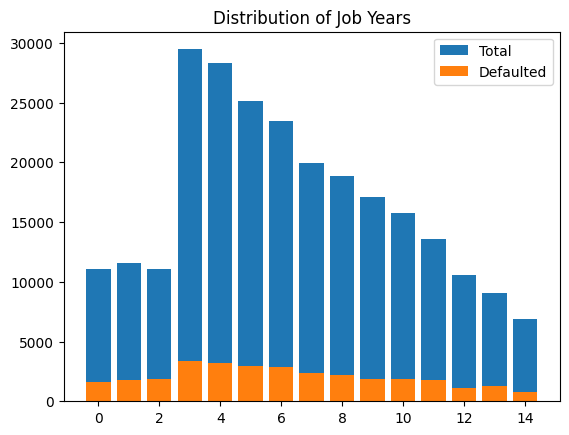

In [96]:
plt.bar(job_yrs_counts.index, job_yrs_counts['Total'])
plt.bar(job_yrs_counts.index, job_yrs_counts['Defaulted'])
plt.legend(['Total', 'Defaulted'])
plt.title('Distribution of Job Years')
plt.show()

### Model Development

### Attempting city/state_match variable

I will try to create variable, CITY/STATE_Match, that indicates if indicated CITY is in fact located in the provided STATE. To do this, I'll need a dataset containing the cities in India, as well as their state.

As such, I will use a dataset providing this information. This dataset is a subset of the World Cities Database provided by simplemaps.com. The dataset I will be using was modified to include only cities in India -- having columns for city name, admin/state name, and admin/state name without diacritics.

Source link: https://simplemaps.com/data/world-cities

In [ ]:
url = 'https://raw.githubusercontent.com/BenjaminUy/Predicting-Loan-User-Default-Risk/refs/heads/main/datasets/IndiaCities.csv'
india_cities = pd.read_csv(url)
india_cities.head()

,city_ascii,admin_name,admin_name_ascii
0,Delhi,Delhi,Delhi
1,Mumbai,Mah?r?shtra,Maharashtra
2,Kolkata,West Bengal,West Bengal
3,Bangalore,Karn?taka,Karnataka
4,Chennai,Tamil N?du,Tamil Nadu


In [ ]:
# Ensuring formatting consistencies

# Replace any spaces in city_ascii and admin_name_ascii with '_'
india_cities['city_ascii'] = india_cities['city_ascii'].str.replace(' ', '_')
india_cities['admin_name_ascii'] = india_cities['admin_name_ascii'].str.replace(' ', '_')

# Replace any instances of '_and_' or '_&_' with '_And_'
india_cities['city_ascii'] = india_cities['city_ascii'].str.replace('_and_', '_And_')
india_cities['admin_name_ascii'] = india_cities['admin_name_ascii'].str.replace('_and_', '_And_')
india_cities['city_ascii'] = india_cities['city_ascii'].str.replace('_&_', '_And_')
india_cities['admin_name_ascii'] = india_cities['admin_name_ascii'].str.replace('_&_', '_And_')

In [ ]:
# Create new variable 'city/state' which is the concatenation of
# city_ascii, '/', and admin_name_ascii
india_cities['city/state'] = india_cities['city_ascii'] + '/' + india_cities['admin_name_ascii']
india_cities.head()

,city_ascii,admin_name,admin_name_ascii,city/state
0,Delhi,Delhi,Delhi,Delhi/Delhi
1,Mumbai,Mah?r?shtra,Maharashtra,Mumbai/Maharashtra
2,Kolkata,West Bengal,West_Bengal,Kolkata/West_Bengal
3,Bangalore,Karn?taka,Karnataka,Bangalore/Karnataka
4,Chennai,Tamil N?du,Tamil_Nadu,Chennai/Tamil_Nadu


In [ ]:
india_cities.dropna(inplace=True)
india_cities.drop_duplicates(subset = 'city/state', inplace=True)
india_cities.reset_index(inplace=True, drop=True)

In [ ]:
india_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city_ascii        6844 non-null   object
 1   admin_name        6844 non-null   object
 2   admin_name_ascii  6844 non-null   object
 3   city/state        6844 non-null   object
dtypes: object(4)
memory usage: 214.0+ KB


In [ ]:
# Now let's create a similar variable in the first dataframe
df['city/state'] = df['CITY'] + '/' + df['STATE']
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,city/state
0,1303834,23,3,single,rented,no,Mechanical_Engineer,Rewa,Madhya_Pradesh,3,13,0,Rewa/Madhya_Pradesh
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,Parbhani/Maharashtra
2,3991815,66,4,married,rented,no,Technical_Writer,Alappuzha,Kerala,4,10,0,Alappuzha/Kerala
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Bhubaneswar/Odisha
4,5768871,47,11,single,rented,no,Civil_Servant,Tiruchirappalli,Tamil_Nadu,3,14,1,Tiruchirappalli/Tamil_Nadu


In [ ]:
# Now we check if the given city/state value in df is found in india_cities
df['city/state_match'] = df['city/state'].isin(india_cities['city/state'])
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,city/state,city/state_match
0,1303834,23,3,single,rented,no,Mechanical_Engineer,Rewa,Madhya_Pradesh,3,13,0,Rewa/Madhya_Pradesh,True
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,Parbhani/Maharashtra,True
2,3991815,66,4,married,rented,no,Technical_Writer,Alappuzha,Kerala,4,10,0,Alappuzha/Kerala,False
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Bhubaneswar/Odisha,False
4,5768871,47,11,single,rented,no,Civil_Servant,Tiruchirappalli,Tamil_Nadu,3,14,1,Tiruchirappalli/Tamil_Nadu,False


In [ ]:
df['city/state_match'].value_counts()

,count
city/state_match,
True,177640
False,74360


In [ ]:
df[df['city/state_match'] == False]

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,city/state,city/state_match
2,3991815,66,4,married,rented,no,Technical_Writer,Alappuzha,Kerala,4,10,0,Alappuzha/Kerala,False
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Bhubaneswar/Odisha,False
4,5768871,47,11,single,rented,no,Civil_Servant,Tiruchirappalli,Tamil_Nadu,3,14,1,Tiruchirappalli/Tamil_Nadu,False
9,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0,Karimnagar/Telangana,False
13,8043880,57,12,single,rented,no,Financial_Analyst,Kollam,Kerala,8,10,0,Kollam/Kerala,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251985,3509299,71,16,single,owned,no,Flight_Attendant,Motihari,Bihar,8,14,0,Motihari/Bihar,False
251987,6200535,72,6,single,rented,no,Physician,Sangli-Miraj_&_Kupwad,Maharashtra,6,12,0,Sangli-Miraj_&_Kupwad/Maharashtra,False
251993,8141027,60,10,single,rented,no,Secretary,Bhusawal,Maharashtra,9,13,1,Bhusawal/Maharashtra,False
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,Kalyan-Dombivli/Maharashtra,False
